## Часть 1. Приоритизация гипотез.

Используя данные интернет-магазина приоритезировать гипотезы и произвести оценку результатов A/B-тестирования.

In [1]:
# импортируем бибилиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

Для приоритизации гипотез воспользуемся методом ICE / RICE.

In [2]:
df_hypothesis = pd.read_csv('/datasets/hypothesis.csv')
df_hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
df_hypothesis['ICE'] = df_hypothesis['Impact'] * df_hypothesis['Confidence'] / df_hypothesis['Efforts']
df_hypothesis['RICE'] =  (df_hypothesis['Reach'] * df_hypothesis['Impact'] * df_hypothesis['Confidence'] 
                          / df_hypothesis['Efforts'])

display(df_hypothesis.sort_values(by='ICE', ascending=False))
display(df_hypothesis.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### Вывод.

Анализ гипотез методом ICE показал, что наиболее перспективными являются гипотезы 8, 0 и 7. В них самые высокие показатели влияния на пользователей и уверенности в гипотезах.

После применения метода RICE на первое место вышла гипотеза 7, так как она имеет максимальный охват пользователей (10 из 10). На второе место вышла гипотеза 2: при средних показателях "влияния" и "уверенности" эта гипотеза имеет большой уровень охвата пользователей. На третьем месте гипотеза 0. У неё достаточно низкий уровень охвата, но высокие показатели "влияние" и "уверенности" при средних затратах ресурсов позволяют этой гипотезе войти в ТОП-3 самых перспективных.

## Часть 2. Анализ A/B-теста.

In [2]:
# загрузим данные А/Б тестов
df_orders = pd.read_csv(r'C:\Users\svyatkinaa93\Desktop\orders.csv')
df_visitors = pd.read_csv(r'C:\Users\svyatkinaa93\Desktop\visitors.csv')

display(df_orders.head(5))
df_orders.info()
display(df_visitors.head(5))
df_visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [3]:
# приведём даты в формат DateTime
df_orders['date'] = pd.to_datetime(df_orders['date'], format='%Y/%m/%d')

df_visitors['date'] = pd.to_datetime(df_visitors['date'], format='%Y/%m/%d')

In [4]:
# создаём таблицу с кумулятивными показателями заказов, покупателей, выручки и посетителей по группам
date_groups = df_orders[['date', 'group']].drop_duplicates()
orders_aggregated = (date_groups
                     .apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])]
                     .agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis=1)
                     .sort_values(by=['date', 'group'])
                    )
visitors_aggregated = (date_groups
                       .apply(lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], df_visitors['group'] == x['group'])]
                       .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)
                       .sort_values(by=['date', 'group'])
                      )

cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [5]:
# создадим функцию для построения графиков кумулятивных метрик по группам
def cumulative_plot(df, column_y, title, y_label):
    plt.figure(figsize=(10,5))
    plt.plot(df.query('group=="A"')['date'], 
         df.query('group=="A"')[column_y], 
         linewidth=2.5,
         label='A')
    plt.plot(df.query('group=="B"')['date'], 
         df.query('group=="B"')[column_y], 
         linewidth=2.5,
         label='B')
    plt.title(title, fontsize='xx-large')
    plt.xlabel('Даты')
    plt.ylabel(y_label)
    plt.xticks(rotation=60)
    plt.legend()
    plt.grid()
    plt.show()

# создадим функцию для построения графиков относительного изменения Б к А
def relative_plot(df, metric, title, y_label):
    
    # создаём таблицу с данными
    merge_data = (df.query('group=="A"')[['date', metric]]
              .merge(df.query('group=="B"')[['date', metric]], on='date', suffixes=['_A', '_B']))
    
    # строим график
    plt.figure(figsize=(10,5))
    plt.plot(merge_data['date'], 
        (merge_data[metric+'_B'] / merge_data[metric+'_A'] - 1)*100,
        linewidth=2.5)
    plt.title(title, fontsize='xx-large')
    plt.xlabel('Даты')
    plt.ylabel(y_label)
    plt.xticks(rotation=60)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.grid()
    plt.show()

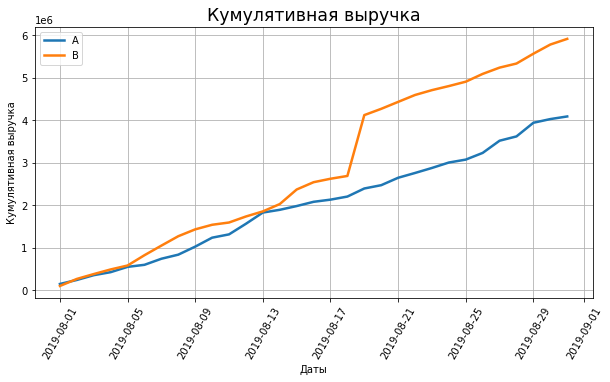

In [6]:
# строим график кумулятивной выручки по группам
warnings.filterwarnings("ignore")

cumulative_plot(cumulative_data, 'revenue', 'Кумулятивная выручка', 'Кумулятивная выручка')

### Вывод по графику.
До середины эксперимента группы выручка группы Б незначительно превышала выручку группы А. Но после 17.08 в группе Б виден резкий скачок, после которого разрыв с группой А стал сильным. После этого скачка гурппа Б продолила лидировать до конца эксперимента. Возможно, что несколько аномально больших заказов повлияли на выручку в группе Б или резко увеличилось число покупателей. Это необходимо учесть в дальнейшем анализе эксперимента

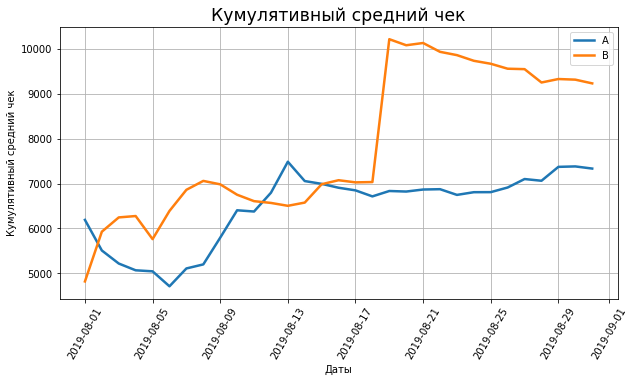

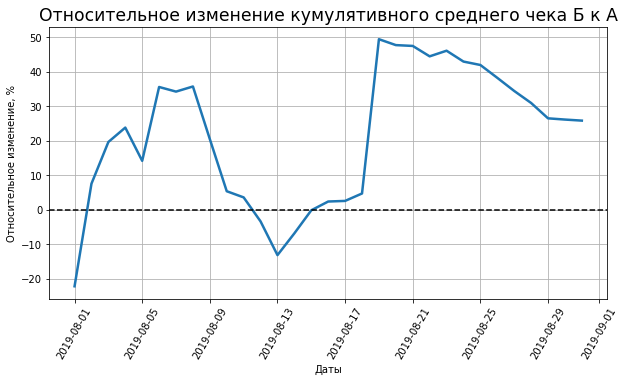

In [9]:
# строим график изменений кумулятивного среднего чека по группам
cumulative_data['avg_check'] = cumulative_data['revenue'] / cumulative_data['orders']

cumulative_plot(cumulative_data, 'avg_check', 'Кумулятивный средний чек', 'Кумулятивный средний чек')

# строим график относительного изменения среднего чека
relative_plot(cumulative_data, 
              'avg_check', 
              'Относительное изменение кумулятивного среднего чека Б к А', 
              'Относительное изменение, %')  

### Вывод по графику.
В графики изменений кумулятивного среднего чека и относительного изменения Б к А виден тот же скачок в середине эксперимента. Это говорит о том, что в группе Б появилась аномально дорогая покупка (покупки), что может сильно повлиять на результат эксперимента.

Но ни в группе А, ни в Б конверсия ещё не установилась на определённом уровне. После резкого скачка средний чек в Б снижается. Возможно, если исключить аномалии и просто продолжить график группы Б, средний чек окажется меньше, чем в группе А.

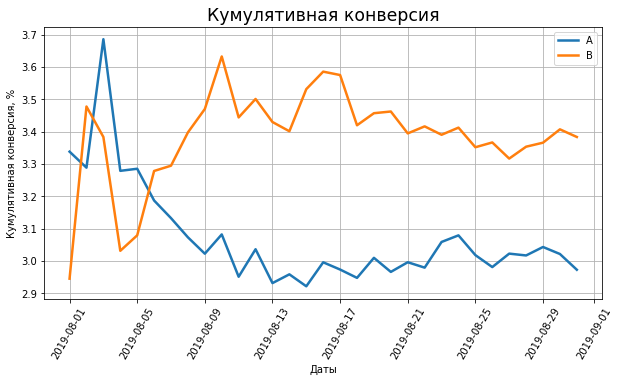

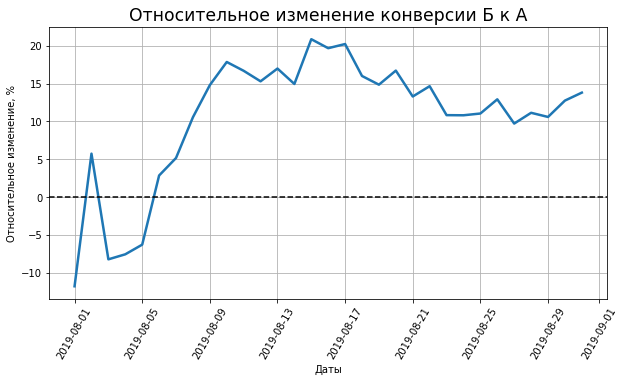

In [10]:
# график кумулятивной конверсии по группам
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors'] * 100

cumulative_plot(cumulative_data, 'conversion', 'Кумулятивная конверсия', 'Кумулятивная конверсия, %')

# график относительного изменения конверсии Б к А
relative_plot(cumulative_data, 'conversion', 'Относительное изменение конверсии Б к А', 'Относительное изменение, %' )


### Вывод по графику.
В начале эксперимента были сильные скачки, но можно сказать, что график конверсий обеих групп зафиксировался. Для группы Б - на уровне между 3.4% и 3.5%. Для группы А - между 2.9% и 3.1%. Относительное изменение конверсии зафиксировалось на разнице от 10% до 15% в пользу группы Б.

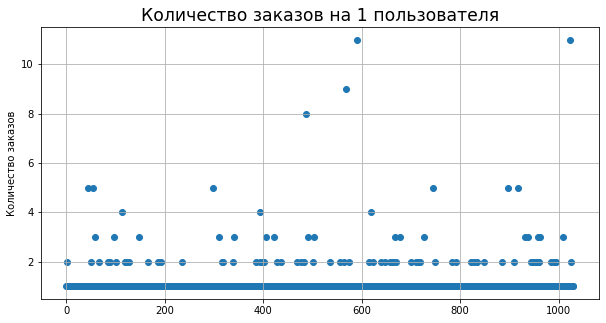

 90-й персентиль = 1.0 
 95-й персентиль = 2.0 
 99-й персентиль = 4.0


In [11]:
# строим график количества заказов на 1 пользователя
orders_by_users = df_orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

plt.figure(figsize=(10,5))
plt.scatter(pd.Series(range(0,len(orders_by_users))), orders_by_users['transactionId'])
plt.title('Количество заказов на 1 пользователя', fontsize='xx-large')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

print(' 90-й персентиль =', np.percentile(orders_by_users['transactionId'], 90),'\n',
     '95-й персентиль =', np.percentile(orders_by_users['transactionId'], 95),'\n',
     '99-й персентиль =', np.percentile(orders_by_users['transactionId'], 99))

### Вывод по графику.

- Большинство пользователей (90%) совершили только 1 заказ. 
- 1 или 2 заказа соврешили 95% пользователей.
- 99% пользователей совершили 4 заказа и меньше.
- выбросы есть вплоть до 11 заказов, но всё, что больше 4 можно считать аномальным.

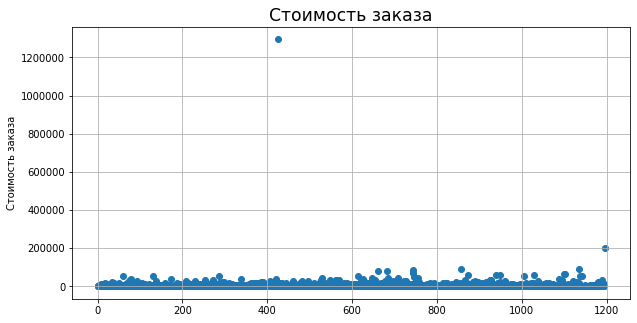

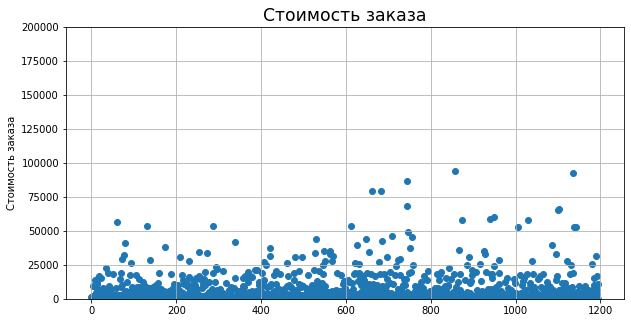

 90-й персентиль = 18168.000000000015 
 95-й персентиль = 28000.000000000004 
 99-й персентиль = 58233.19999999999


In [14]:
# строим график стоимости 1 заказа

plt.figure(figsize=(10,5))
plt.scatter(pd.Series(range(0,len(df_orders['revenue']))), df_orders['revenue'])
plt.title('Стоимость заказа', fontsize='xx-large')
plt.ylabel('Стоимость заказа')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(pd.Series(range(0,len(df_orders['revenue']))), df_orders['revenue'])
plt.title('Стоимость заказа', fontsize='xx-large')
plt.ylabel('Стоимость заказа')
plt.ylim(0, 200000)
plt.grid()
plt.show()

print(' 90-й персентиль =', np.percentile(df_orders['revenue'], 90),'\n',
     '95-й персентиль =', np.percentile(df_orders['revenue'], 95),'\n',
     '99-й персентиль =', np.percentile(df_orders['revenue'], 99))

### Вывод по графику.

- 90% всех заказов стоят до 18168.
- 99% - до 58233.
- нашёлся супер-аномальный заказ стоимостью 1200000(!) и ещё несколько аномалий до 100000.

## Проверяемя результаты теста:

In [15]:
# создадим датафрейм для проверки гипотез
final_data = (cumulative_data.query('group=="A"')[['date', 'orders', 'revenue', 'visitors']]
              .merge(cumulative_data.query('group=="B"')[['date', 'orders', 'revenue', 'visitors']],
                    how='left', on='date', suffixes=['_cum_A', '_cum_B'])
             )

visitors_daily = (df_visitors.query('group=="A"')[['date', 'visitors']]
                    .merge(df_visitors.query('group=="B"')[['date', 'visitors']],
                    how='left', on='date', suffixes=['_day_A', '_day_B'])
                   )

orders_daily = (df_orders.query('group=="A"')
                    .groupby('date', as_index=False).agg({'transactionId':'nunique', 'revenue':'sum'})
                .merge(df_orders.query('group=="B"')
                       .groupby('date', as_index=False).agg({'transactionId':'nunique', 'revenue':'sum'}), 
                how='left', on='date', suffixes=['_day_A', '_day_B'])
               )

final_data = (final_data
              .merge(visitors_daily, on='date', how='left',)
              .merge(orders_daily, on='date', how='left',)
             )
final_data.head(5)

,date,orders_cum_A,revenue_cum_A,visitors_cum_A,orders_cum_B,revenue_cum_B,visitors_cum_B,visitors_day_A,visitors_day_B,transactionId_day_A,revenue_day_A,transactionId_day_B,revenue_day_B
0,2019-08-01,24,148579,719,21,101217,713,719,713,24,148579,21,101217
1,2019-08-02,44,242401,1338,45,266748,1294,619,581,20,93822,24,165531
2,2019-08-03,68,354874,1845,61,380996,1803,507,509,24,112473,16,114248
3,2019-08-04,84,425699,2562,78,489567,2573,717,770,16,70825,17,108571
4,2019-08-05,109,549917,3318,101,581995,3280,756,707,25,124218,23,92428


### Тест 1.
**Гипотеза_0**: между группами А и Б нет статистически значимых различий в конверсии.

**Гипотеза_1**: конверисия между группами отличается.

In [16]:
# считаем статистическую значимость различий в конверсии  по сырым данным
orders_by_users_A = (df_orders
                     .query('group=="A"')
                     .groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
                    )
orders_by_users_B = (df_orders
                     .query('group=="B"')
                     .groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
                    )

sample_A = pd.concat([orders_by_users_A['transactionId'], 
                     pd.Series(0, index=np.arange(final_data['visitors_day_A'].sum() - len(orders_by_users_A)))], axis=0)
sample_B = pd.concat([orders_by_users_B['transactionId'], 
                     pd.Series(0, index=np.arange(final_data['visitors_day_B'].sum() - len(orders_by_users_B)))], axis=0)

print('p-value = {:.3f}'.format(stats.mannwhitneyu(sample_A, sample_B)[1]))

p-value = 0.008


### Вывод.
Из сравнения сырых данных видно, что в конверсии групп А и Б есть статистически значимые различия. Значение p-value сильно меньше 0.05. Значит получить такую разницу случайно маловероятно.

### Тест 2.
**Гипотеза_0**: между группами А и Б нет статистически значимых различий в среднем чеке.

**Гипотеза_1**: средний чек между группами отличается.

In [17]:
# считаем статистическую значимость различий в среднем чеке по сырым данным
print('p-value = {:.3f}'.format(stats.mannwhitneyu(df_orders.query('group=="A"')['revenue'], 
                                                   df_orders.query('group=="B"')['revenue'])[1]))

print('Относительная разница B к A = {:.1%}'.format(
    df_orders.query('group=="B"')['revenue'].mean()/df_orders.query('group=="A"')['revenue'].mean()-1))

p-value = 0.365
Относительная разница B к A = 25.9%


### Вывод.
Статистически значимых различий в среднем чеке по сырым данным нет. Хотя относительное различие среднего чека составлет 26%. Очевидно, что на среднем чеке сильно сказываются аномалии, к которым не чувствителе критерий Манна-Уитни.

Проверим, как на различия в группах повлияет исключение аномалий. Примем за аномальных пользователей, совершивших больше 2 заказов или совершил заказы дороже 28000 (95 процентиль в обоих случаях).

### Тест 3.
**Гипотеза_0**: после сключения аномалий между группами А и Б нет статистически значимых различий в конверсии.

**Гипотеза_1**: после сключения аномалий конверисия между группами отличается.

In [19]:
# находим аномальных пользователей
abnormal_users = (pd.concat([orders_by_users_A.query('transactionId > 2')['visitorId'],
                             orders_by_users_B.query('transactionId > 2')['visitorId'],
                            df_orders.query('revenue > 28000')['visitorId']], axis=0)
                 ).drop_duplicates()


# считаем статистическую значимость различий в конверсии
sample_A_filtred = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['visitorId'].isin(abnormal_users))]['transactionId'],
                             pd.Series(0,index=np.arange(final_data['visitors_day_A'].sum() - len(orders_by_users_A)))])

sample_B_filtred = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['visitorId'].isin(abnormal_users))]['transactionId'],
                             pd.Series(0,index=np.arange(final_data['visitors_day_B'].sum() - len(orders_by_users_B)))])

print('p-value = {:.7f}'.format(stats.mannwhitneyu(sample_A_filtred, sample_B_filtred)[1]))


p-value = 0.0065213


### Вывод.
На очищенных данных p-value в сравнение конверсий ещё более уменьшилось. Это значит, что различие в конверсии между граппами стат. значимо как на сырых, так и на очищенных данных.

### Тест 4.
**Гипотеза_0**: после сключения аномалий между группами А и Б нет статистически значимых различий в среднем чеке.

**Гипотеза_1**: после сключения аномалий средний чек между группами отличается.

In [20]:
# считаем статистическую значимость различий в среднем чеке
print('p-value = {:.7f}'.format(stats.mannwhitneyu(
    df_orders[np.logical_and(df_orders['group'] == 'A', 
                             np.logical_not(df_orders['visitorId'].isin(abnormal_users)))]['revenue'], 
    df_orders[np.logical_and(df_orders['group'] == 'B', 
                             np.logical_not(df_orders['visitorId'].isin(abnormal_users)))]['revenue'])[1]))

print('Относительная разница B к A = {:.1%}'.format(
    df_orders[np.logical_and(df_orders['group'] == 'B', 
                             np.logical_not(df_orders['visitorId'].isin(abnormal_users)))]['revenue'].mean()/
    df_orders[np.logical_and(df_orders['group'] == 'A', 
                             np.logical_not(df_orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1))

p-value = 0.3692409
Относительная разница B к A = -2.0%


### Вывод.
Разница в среднем чеке осталась не статистически значимой. При этом относительная разница среднего чека Б к А сильно уменьшилась и стала отрицательной.


## Общий вывод:
1. Есть статистически значимые различия в конверсии между группами как по сырым данным, так и по очищенным.
2. Нет статистически значимых различий в среднем чеке между группами как по срым, так и по очищенным данным.
3. График кумулятивной конверсии и относительного различия в конверсии показывает, что результаты группы Б лучше. График зафиксировался на разнице в 10-15%.
4. График среднего чека сильно скачет. Также в группе Б обнаружились сильные аномалии, которые исказали данные. Сделать однозначные выводы о победе одной из групп нельзя.


Можно остановить тест и признать победу группы Б. Статистически значимое различие в конверсии, даже при остутствии различий в среднем чеке, ведёт к увеличению прибыли компании.